In [1]:
import numpy as np
import pyod.utils.data as pyod
from pyod.models.knn import KNN
import matplotlib.pyplot as plt
from sklearn import metrics

Ex1

In [3]:
x_train, x_test, y_train, y_test = pyod.generate_data(n_train=400,n_test=100,n_features=2,contamination=0.1,random_state=42)

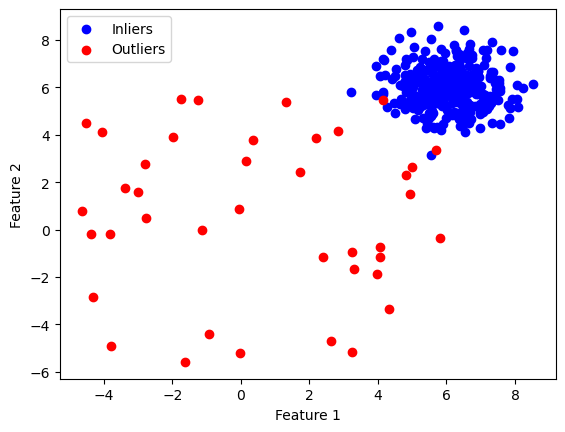

In [4]:
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], 
            color='blue', label='Inliers')

plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], 
            color='red', label='Outliers')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Ex2

In [6]:
knn = KNN(contamination=0.1)
knn.fit(x_train)

train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

In [7]:
C = metrics.confusion_matrix(y_test, test_pred)
print(C)

TP = C[1][1]
FN = C[1][0]
TN = C[0][0]
FP = C[0][1]

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
BA = (TPR + TNR) / 2

print(BA)

[[90  0]
 [ 1  9]]
0.95


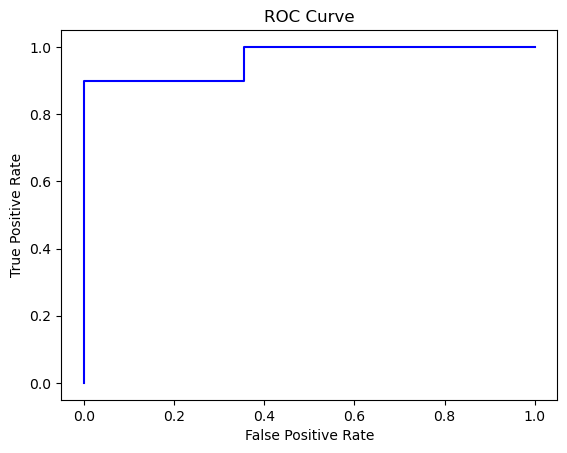

In [26]:
y_scores = knn.decision_function(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)

plt.plot(fpr, tpr, color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Ex3

In [10]:
x, _, y, _ = pyod.generate_data(n_train=1000,n_test=0,n_features=1,contamination=0.1,random_state=42)

mean = np.mean(x)
std_dev = np.std(x)
z_scores = (x - mean) / std_dev

z_threshold = np.quantile(np.abs(z_scores), 0.9)
print(z_threshold)

anomalies = np.abs(z_scores) > z_threshold
#print(anomalies)

0.9297742034791007


In [11]:
C = metrics.confusion_matrix(y, anomalies.astype(int))
print(C)

TP = C[1][1]
FN = C[1][0]
TN = C[0][0]
FP = C[0][1]

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
BA = (TPR + TNR) / 2

print(BA)

[[871  29]
 [ 29  71]]
0.8388888888888888


Ex4

In [13]:
x1 = np.random.normal(loc=5, scale=2, size=1000)
x2 = np.random.normal(loc=7, scale=3, size=1000)
x = np.vstack((x1, x2)).T

y = np.zeros(1000)
y[:100] = 1 #10% contamination rate

indices = np.arange(1000)
np.random.shuffle(indices)
x = x[indices]
y = y[indices]

In [14]:
mean = np.mean(x, axis=0)
euclidean_distances = np.linalg.norm(x - mean, axis=1)

threshold = np.quantile(euclidean_distances, 0.9)
print(threshold)

anomalies = euclidean_distances > threshold

5.505496168314087
[False False False False False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False  True False False  True False False False False
  True False False  True  True False False False False False  True False
 False False False  True False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False  True False False
 False False False False False Fa